In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks

In [3]:
using Plots

In [19]:
using Random: Xoshiro, AbstractRNG

In [9]:
n_cb = 20
n_vsa = 1024

1024

In [7]:
rng0 = Xoshiro(42)

Xoshiro(0xa379de7eeeb2a4e8, 0x953dccb6b532b3af, 0xf597b8ff8cfd652a, 0xccd7337c571680d1, 0xc90c4a0730db3f7e)

In [10]:
X_cb = random_symbols((n_cb, n_vsa), rng0)
Y_cb = random_symbols((n_cb, n_vsa), rng0);

In [17]:
so0 = similarity_outer(X_cb, Y_cb, dims=1);

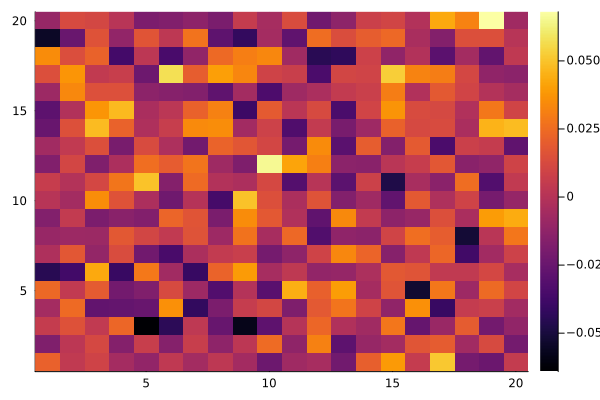

In [18]:
heatmap(so0[1,:,:])

In [26]:
rand(rng0, 1:12)

1

In [27]:
size(X_cb,1)

20

In [43]:
function generate_composition(rng::AbstractRNG, codebooks...)
    ns = [size(cb,1) for cb in codebooks]
    indices = [rand(rng, 1:n) for n in ns]
    symbols = [codebooks[i][indices[i],:] for i in 1:length(codebooks)]
    factors = stack(symbols, dims=1)
    symbol = v_bind(factors, dims=1)
    return factors, symbol
end

generate_composition (generic function with 1 method)

In [44]:
fac, sym = generate_composition(rng0, X_cb, Y_cb)

([-0.5979862213134766 0.16246676445007324 … -0.021882057189941406 0.6497248411178589; 0.16248059272766113 -0.8030517101287842 … 0.21419477462768555 -0.111053466796875], [-0.43550562858581543 -0.6405849456787109 … 0.19231271743774414 0.5386713743209839])

In [45]:
fac

2×1024 Matrix{Float64}:
 -0.597986   0.162467  -0.272459  …  0.343437   -0.0218821   0.649725
  0.162481  -0.803052   0.473921     0.0855459   0.214195   -0.111053

In [46]:
sym

1×1024 Matrix{Float64}:
 -0.435506  -0.640585  0.201462  0.385971  …  0.428983  0.192313  0.538671

In [52]:
chk1 = similarity_outer(sym, X_cb, dims=1);

In [53]:
chk2 = similarity_outer(sym, Y_cb, dims=1);

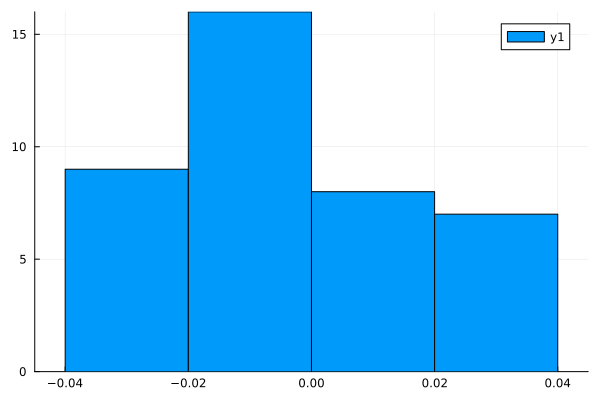

In [50]:
histogram(cat(chk1, chk2, dims=3)|> vec)

In [55]:
fac |> size

(2, 1024)

In [56]:
yy = v_unbind(sym, fac[1:1,:])

1×1024 Matrix{Float64}:
 0.162481  -0.803052  0.473921  0.912767  …  0.0855459  0.214195  -0.111053

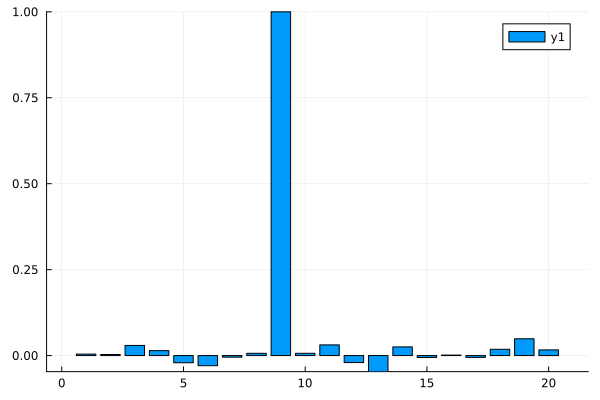

In [58]:
bar(similarity_outer(yy, Y_cb, dims=1) |> vec)

In [59]:
xx = v_unbind(sym, fac[2:2,:])

1×1024 Matrix{Float64}:
 -0.597986  0.162467  -0.272459  -0.526796  …  0.343437  -0.0218821  0.649725

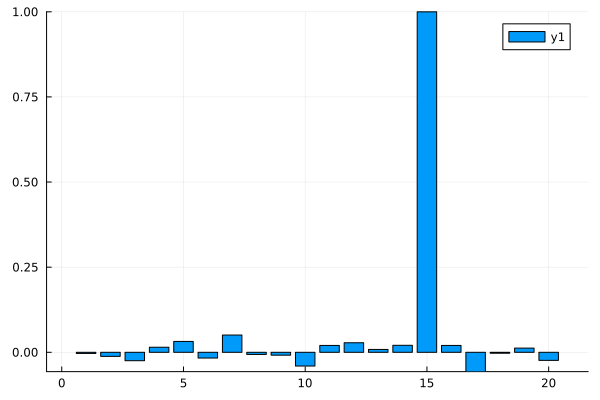

In [60]:
bar(similarity_outer(xx, X_cb, dims=1) |> vec)

In [66]:
function initialize_guesses(codebooks::AbstractArray...)
    function inner(codebook::AbstractArray)
        return v_bundle(codebook, dims=1)
    end

    guesses = collect(map(inner, codebooks))
    return guesses
end

initialize_guesses (generic function with 1 method)

In [70]:
x_cb, y_cb = initialize_guesses(X_cb, Y_cb)

2-element Vector{Matrix{Float64}}:
 [-0.3590450331537608 -0.12601368849529404 … -0.007139724235720468 0.29186573919248443]
 [0.755667336520337 0.8475005839653564 … 0.4821915168463748 -0.30048840957188777]

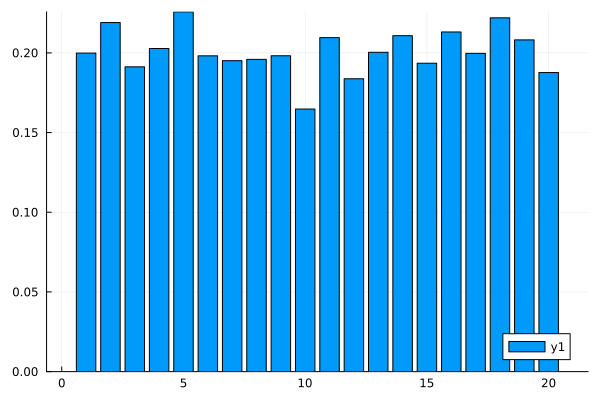

In [71]:
bar(similarity_outer(x_cb, X_cb, dims=1) |> vec)

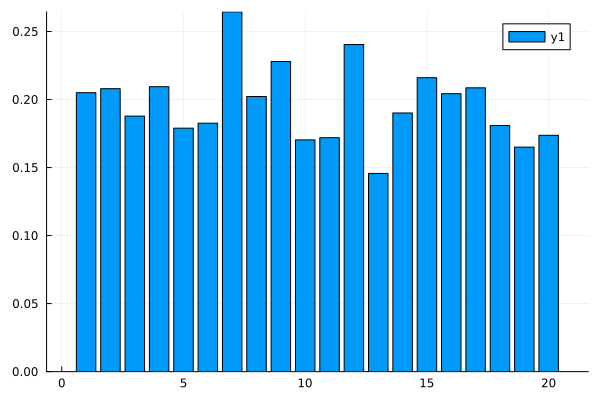

In [72]:
bar(similarity_outer(y_cb, Y_cb, dims=1) |> vec)